# ( A1.3 Regresión lineal multiple)         
                                                                                                       
                                                                            Fernando Ariel Lozano Castillo
1. Primero importaremos los datos del archivo **NASA.csv**  en la variable `df` y  revisaremos las dimensiones
del data frame e imprimiremos en consola tanto dichas dimensiones  con la función `shape`como las primeras 15 filas
de datos con la función `head`.


In [166]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

#Leemos el archivo
df = pd.read_csv("NASA.csv")
print("Dimensiones :", df.shape , "\n")
#Imprimimos las primeras 15 filas
print(df.head(15))

Dimensiones : (1503, 6) 

    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0.0    0.3

2. Ahora separaremos el data frame en **datos de entrenamiento** dentro de la variable `train` y **datos de prueba** en la variable `test` con una proporción de *70/30*. Es decir que ***70% para entrenar*** el modelo y el ***resto para validar los resultados*** con una partición aleatoria con el operador `sample` de pandas y el operador `drop` e `index`  para generar a `test` sin los elementos usados para el subset de entrenamiento.

In [26]:
# Geberamos los datos de entrenamiento
train = df.sample(frac = 0.7)
#Ahora los de validación
test = df.drop(train.index)

#Imprime las dimensiones de los datos de entrenamienot
print("Dimensiones de Train: ",train.shape)
#Imprime las dimensiones de los datos de prueba
print("Dimensiones de Test: ", test.shape)

Dimensiones de Train:  (1052, 6)
Dimensiones de Test:  (451, 6)


Posteriormente, imprimiremos la cantidad de observaciones de cada conjunto de datos y comprobamos  si la suma de elementos en train y test es igual a la del dataset original.

In [62]:

if (train.shape[0] + test.shape[0] == df.shape[0]):
 print(" La división de los datos es correcta.")
else:
 print(" Hay una discrepancia en la división de los datos.","/n")

 La división de los datos es correcta.


3. Es momento de ***realizar la regresión lineal múltiple***.<br>
En esta ocasión nos apoyaremos de la misma función  `OLS` de la librería statsmodels.api.

- **Primero definiremos $X$ y $Y$** a partir de los datos de entrenamiento.<br>
Para **X**  eliminaremos la columna `presión` del dataset *train* usando el operador  `drop` y el parámetro `axis = 1` que eliminará la columna elegida.<br>
Para **Y** será solo la columna `presión`.<br>



In [89]:
X = train.drop('presion', axis = 1)
Y = train.presion

- **Después** definiremos el modelo `model` con la función `OLS`, utilizando como parámetros `Y` y `sm.add_constant(X)` para asegurarnos que el modelo incluya $\beta_0$.<b>


In [91]:
model = sm.OLS(Y,sm.add_constant(X))

- **Finalmente**, estimaremos el valor de cada coeficiente con el método `fit`, almacenando los resultados en `results`. Para revisar los resultados obtenidos, imprimiremos en pantalla un resumen utilizando el método `summary()`.<br><br>

In [93]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     209.6
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          7.31e-155
Time:                        01:02:23   Log-Likelihood:                -3154.3
No. Observations:                1052   AIC:                             6321.
Df Residuals:                    1046   BIC:                             6350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.2140      0.661    201.597      0.0

Debido a que tenemos interés en conocer los *p-value* de cada variable, imprimimos manualmente los valores exactos de dichas métricas con el atributo `pvalues`.

In [95]:
# Imprimir manualmente los p-values exactos
print("\nP-values exactos:")
print(results.pvalues)


P-values exactos:
const          0.000000e+00
frecuencia    1.931591e-105
angulo         1.010647e-20
longitud       5.267306e-62
velocidad      8.384205e-20
espesor        1.381217e-15
dtype: float64


4. A partir de estos datos vemos lo siguiente:


In [110]:
# Imprimir las conclusiones
print("Conclusión sobre la significancia de las variables:")
print("Todas las variables tienen p-values muy pequeños,", )
print("lo que indica que todas son significativamente asociadas con la salida.")


print("\nConclusión sobre la importancia de las variables:")
print("La variable más importante es 'espesor', ya que tiene el coeficiente más grande en valor absoluto (-143)")
print("lo que indica que tiene el mayor impacto en la salida y la que le sigue sería longitud con (34.99).")


Conclusión sobre la significancia de las variables:
Todas las variables tienen p-values muy pequeños,
lo que indica que todas son significativamente asociadas con la salida.

Conclusión sobre la importancia de las variables:
La variable más importante es 'espesor', ya que tiene el coeficiente más grande en valor absoluto (-143)
lo que indica que tiene el mayor impacto en la salida y la que le sigue sería longitud con (34.99).


5. Ahora revisaremos el ajusto del modelo, calculamos el *residual standar error* y la *𝑅^2* para los datos de entrenamiento como para los datos de validación.

- Para los datos del entrenamiento<br>
**RSE** se hace de forma sencilla con la raíz cuadrada del atributo `scale` de los resultados.
**R²** usaremos la función `rsquared`.

In [121]:
# Cálculo de RSE y R² para el conjunto de entrenamiento
rse_train = np.sqrt(results.scale)
r2_train = results.rsquared

# Imprimir RSE y R² para entrenamiento
print("Residual Standard Error (RSE) para entrenamiento: ", rse_train)
print("R² para entrenamiento: ", r2_train)

Residual Standard Error (RSE) para entrenamiento:  4.866200455225037
R² para entrenamiento:  0.5004478925664373


- Para los datos de validación seguiremos una serie de pasos:


1. Generar `XTest` de forma similar a como se generó `X`, pero usando solo los datos de `test`.
2. Estimar el valor de $Y$ para los datos de validación.
3. Generar `YTest` de forma similar a como se generó `Y`.
4. Calcular RSSTest.
5. Calcular TSSTest, estimando el promedio de `YTest` con la función `mean` de numpy.
6. Obtener el valor de `nTest`, la cantidad de observaciones de los datos de validación (debe tener un valor distinto a `n`, pues hay más sujetos en el set de entrenamiento que en el de validación).
7. Obtener el valor de `mTest`, la cantidad de variables en los datos de validación (debe tener el mismo valor que `m`, pues usamos las mismas variables para entrenar y validar).
8. Calcular RSETest (*residual standard error* en validación).
9. Calcular R2Test (R cuadrada en validación).
   

In [142]:
# Genera el elemento XTest
XTest = test.drop('presion', axis = 1)

# Estima los valores de Y para los datos de validación
yhatTest = results.predict(sm.add_constant(XTest))

# Genera el elemento YTest
YTest = test.presion

# Calcula el RSS de validación
RSSTest = sum((YTest-yhatTest)**2)

# Calcula el TSS de validación
TSSTest = sum((YTest-np.mean(YTest))**2)

# Define el valor de n para los datos de prueba
nTest = XTest.shape[0]

# Define el valor de m para los datos de prueba
mTest = XTest.shape[1]

# Calcula el RSE de validación
RSETest = np.sqrt(RSSTest/(nTest-mTest-1))

# Calcula el R^2 de validación
R2Test = 1 - RSSTest / TSSTest

# Imprime el RSE
print("RSE =", RSETest)

# Imprime el R^2
print("R^2 =", R2Test)

RSE = 4.722897343854501
R^2 = 0.5443505564269675


In [148]:
%matplotlib inline

6. Finalmente, tratemos de visualizar los resultados obtenidos. Generando una gráfica de dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos de validación en el eje X, y que cuente con el valor estimado de Y, de acuerdo al modelo, para el mismo conjunto de datos en el eje y.

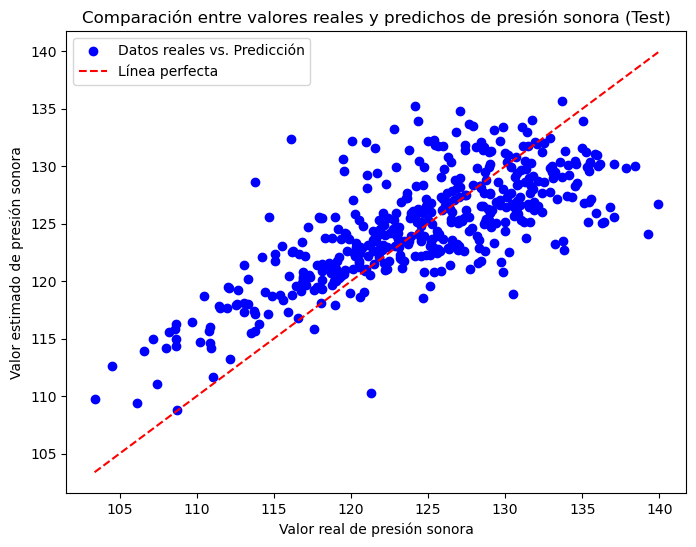

In [150]:
# Crear la gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(YTest, yhatTest, color='blue', label='Datos reales vs. Predicción')

# Añadir la línea de referencia (45 grados)
plt.plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], color='red', linestyle='--', label='Línea perfecta')

# Añadir títulos y etiquetas
plt.title('Comparación entre valores reales y predichos de presión sonora (Test)')
plt.xlabel('Valor real de presión sonora')
plt.ylabel('Valor estimado de presión sonora')
plt.legend()

# Mostrar la gráfica
plt.show()


#### ( Conclusion)     

Idealmente, si el modelo fuera perfecto, veríamos solo la línea roja, que representaría que los valores reales y el valor estimado fueron idénticos. En este caso, no fue así; sin embargo, se nota una tendencia de los datos a agruparse cerca de la linea roja.


El modelo presenta un margen de error considerable, ya que los puntos no están muy cerca de la línea roja que representa la igualdad entre los valores reales y estimados. Idealmente, si el modelo fuera perfecto, se tendría una línea recta con una pendiente de  (45 grados), donde los valores reales y estimados serían idénticos. 

En este caso, la tendencia general es visible, pero los valores predichos no se alinean completamente con los reales. Esto se refleja en un **RSE de 4.72** y un **R² de 0.54**, indicando que el modelo explica solo la mitad de la variabilidad en los datos. Por lo que  ajustar el modelo considerando nuevas variables, aumentando las observaciones o explorando otros enfoques para mejorar su precisión.

**Firma de honor:**  Doy mi palabra que he realizado esta actividad con integridad académica